Predicton of sales of a company based upon expenses made over advertisement sources.

In [1]:
pip install -U scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
#copy this link and download the dataset from browser in csv format
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data[['TV', 'sales']].head()

,TV,sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


In [5]:
import sklearn 
from sklearn.linear_model import LinearRegression

In [6]:
lm = LinearRegression()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = data[['TV']]

In [9]:
Y = data['sales']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state = 42)
lm.fit(X_train, Y_train)

LinearRegression()

In [11]:
lm.coef_

array([0.04816674])

In [12]:
Y_train.shape

(120,)

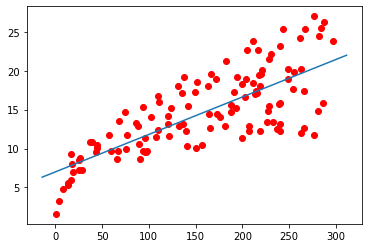

In [13]:
plt.scatter(X_train, Y_train,color='red')
slope = lm.coef_[0]
intercept = 7 
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals)
# sns.pairplot(data, x_vars=['TV'], y_vars='sales', height = 7,  kind='reg')

In [14]:
Predict = lm.predict(X_test)

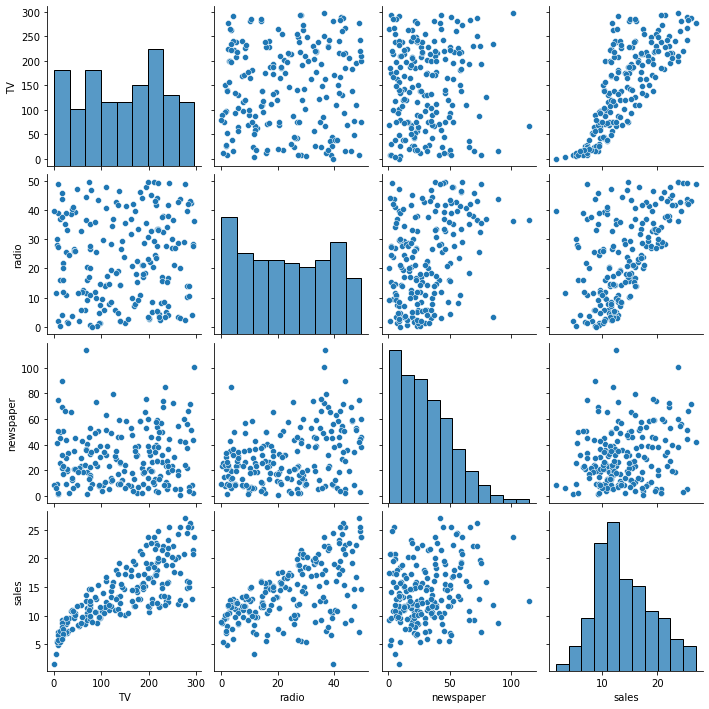

In [15]:

sns.pairplot(data)

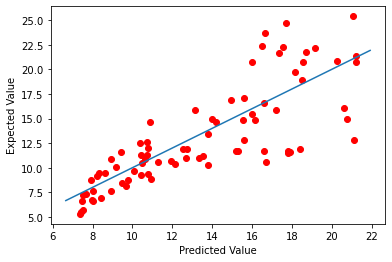

In [16]:
plt.scatter(Predict, Y_test,color='red')
# plt.scatter(X, Y)

slope = 1
intercept = 0
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.xlabel("Predicted Value")
plt.ylabel("Expected Value")
plt.plot(x_vals, y_vals)

In [17]:
#sales = 2.88 + 0.044 * TV + 0.198 * radio + 0.008 * newspaper

In [18]:
mae = sklearn.metrics.mean_absolute_error(Predict, Y_test)
mae

2.283170372702572

In [19]:
mse = sklearn.metrics.mean_squared_error(Predict, Y_test)
mse

9.245846487500003

In [20]:
rmse = sklearn.metrics.mean_squared_error(Predict, Y_test)
np.sqrt(rmse)

3.0406983552302593

In [21]:
#make a model with using only radio and tv and predict sales again

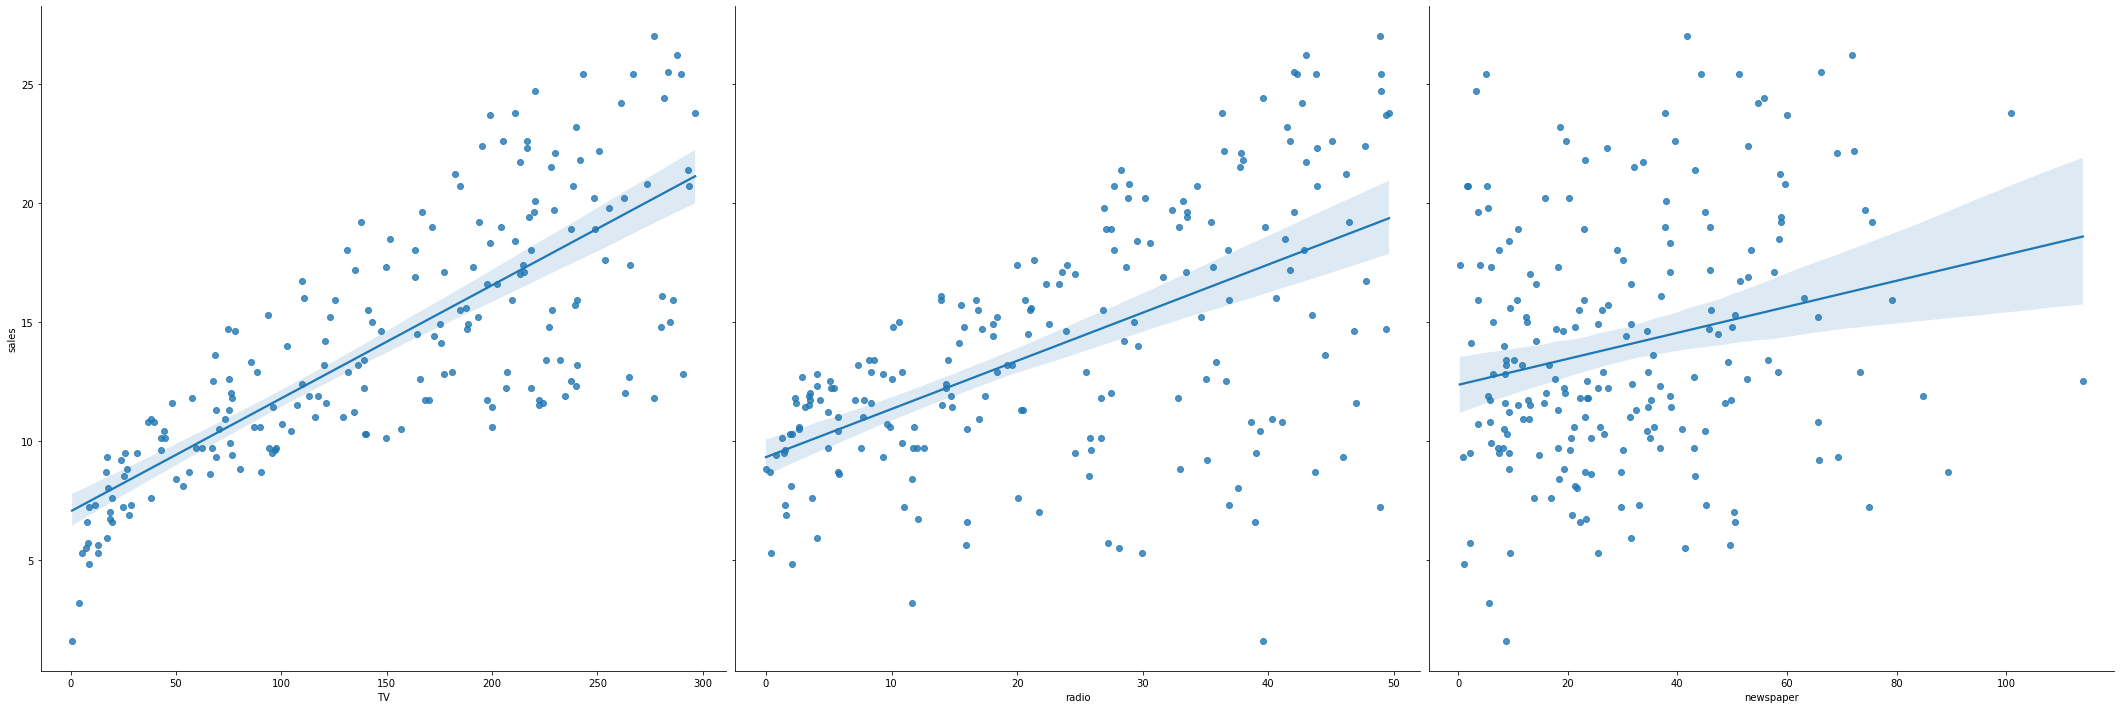

In [22]:
colors = iter(['xkcd:red purple'])
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',height = 10,  kind='reg')